# Neds Heating Options Cost Calculator

## What's this for?
We want to install some kind of proper heating system for Neds. T4 have made a report for us, estimating the up-front costs of an installation, as well as the running costs. On the face of it, the heat pump is much cheaper to run. However, we would need a loan for the upfront costs. Because of the repayments on the loan, the *effective* running costs for a heat pump are more than they at first appear. 

The goal of this is to give all the Nedlets a clear picture of the decision we need to make as a cooperative. To do this, we're first going to go through and talk about the work which we've done on estimating the heating load of the coop, and some of the estimates which T4 have made. 

## Would a heat pump save us money? 
The effective price of getting a heat pump and heating our home will depend on:
- The interest rates we can get for a loan.
- The price of electricity.
- How much heating need we have for the house. This point depends on:
    - How warm we want the house.
    - How well insulated the house is. 

Before we can calculate how much a heat pump would cost, we first need to estimate these values.

## Heat Load and Heating Need

It's imporant for us to understand these two terms. They're closely related, but the difference is important. 

### Heating Load
Before commisioning T4 to make their report, we calculated the *heating load* of the Neds main building (not inc the factory) to be:
- Currently: 27 kW
- When insulation is finished: 17 kW

This is how much energy it would take to keep the building warm on a cold day. 

This number is determined completely by the state of the building - it doesn't depend on us, the price electricity, or anything else. Clearly, the fully insulated house needs less energy than the current house. We haven't bothered to calculate what the load would be for the house before any insulation was done, but it would be even higher. 

### Heating Need
This one *does* depend on us. Whatever the state of the insulation is, if we never turn a heater on then our 'heating need' is 0. If we turn the heating on for one hour in an entire year, then our heating need would be:
- 27 kWh for the house as it currently is.
- 17 kWh for the house as we intend it to be.

Of course, we would never heat the house for a single hour in a year. But that's how the 'need' relates to the load: it's the load for the house, multuplied by how much we use that heating. 


### Forecasting Neds Heating Need
We can work out our current heating need quite simply: we can take a look at our energy bills in the winter, and subtract what we use in the summer; what's left over is probably what we're using on heating (within some margin). T4 have done this calculation, and they work out that we currently use about 10,000 kWh per year on the storage heaters. 

Eyeballing from the Excel reports which SG produces, I think, *__very, very roughly__* that we use another 5,000 kWh per year on daytime heating. 

T4 also estimate our hot water needs as 3,500 kWh per year. So, all together, we can say that currently we use about 18,500 kWh per year on heating and hot water; and that 10,000 of this is on the night tariff, and 8,500 of this is on the day tariff. 

This is where things get a tiny bit complicated. On one hand, the fact that we're insulating our home ought to bring our heating need down, as a result of bringing our heating load *down*. On the other hand, we currently underheat Neds -- very significantly -- and addressing that would bring our heating need *up*. 



## Estimations
We are going to estimate our heating need as follows:
$$
N_p = N_c \times K \times \frac{L_p}{L_c} +N_W
$$

|Symbol| Meaning |
|---|---|
|$N_p$| Predicted Need |
|$N_c$| Current Need |
|$L_c$| Current Load|
|$L_p$| Predicted Load |
|$N_W$| Water Need|
|$K$| Estimation of Heating Increase|

If this doesn't make sense, don't worry. Basically we're going to take into account the info from above, and what T4 have told us. Importantly though, we're also going to estimate *how much more we want* to heat our home. This is going to be represented by $K$, and it'll be an important number in estimating our costs. For now, I'm going to set $K= 1.4$, meaning that we would in future like to use $40\%$ more heating. We can model different scenarios in the future. 

All of this gives us a total predicted need of
$$ N_p = 16, 222 \text{  kWh.}$$
It's worth remembering that this is using $L_p$ values for a Neds which is *fully insulated*. If instead we were talking about today's Neds, fully heated ($k=1.4), we would be looking at $N_p = 24500$


That might seem like a long route to estimate our future heating needs. But without this kind of estimate, it's impossible to think properly about what our heating bill will be in the future.  

So, now we can go on to modelling our finances!

## Finance Modelling
So, now we're ready to look at what our costs would be for different heating options. There's a lot of variablility here, especially with energy prices. Given that energy prices are the main thing likely to vary, I've chosen to produce plots which show the costs for us as these vary. 

As a [reference](https://www.nimblefins.co.uk/average-cost-electricity-kwh-uk) point, at price per kWh in the midlands was 18.4p in 2021, and is now at 26.3p. 

Sarah G got a quote for a loan with an estimated interest rate of 5%. 

|Factor|Value|
|---|---|
Loan | £40, 000
Interest Rate | 6%
Loan Years | 20
Night Tariff ratio | 2/3

The last of these needs explaining: we're currently using a night tariff which is 2/3 the cost of our day tariff. I'm assuming that going forward, as electricity prices rise, the night tariff will rise proportionally to the day tariff. 

In [1]:
from main import *
basic_electric_price = 0.2
Neds_current_low_heat = scenario(**{
    'loan_years': 20,
    'rate': 5,
    'loan_amount': 40_000,
    'heating_need': 15_000,
    'hot_water_need': 3500,
    'electricity_price': .2,
 })

Neds_current_full_heat = scenario(**{
    'loan_years': 20,
    'rate': 5,
    'loan_amount': 40_000,
    'heating_need': 24_000,
    'hot_water_need': 3500,
    'electricity_price': .2,
 })
Neds_future_full_heat = scenario(**{
    'loan_years': 20,
    'rate': 5,
    'loan_amount': 40_000,
    'heating_need': 16_222,
    'hot_water_need': 3500,
    'electricity_price': .2
 })




## Current Insulation, Current Heating Levels

Monthly loan payments would be £263.98 
Monthly heating bill would be £90.69 
Monthly total bill would be 354.67

 Or, with just electric heating:
Monthly heating bill would be £252.78 
Air source becomes cheaper at an electricity price of 33 p


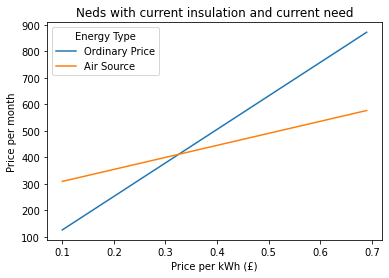

In [2]:
p1= make_scenario_electricity_plot(Neds_current_low_heat)
p1.set_title('Neds with current insulation and current need')
Neds_current_low_heat.electricity_price = basic_electric_price
Neds_current_low_heat.give_summary()
print(f'Air source becomes cheaper at an electricity price of {find_crossing_price(Neds_current_low_heat)*100:.0f} p')

## Current Insulation,Fully Heated 

Monthly loan payments would be £263.98 
Monthly heating bill would be £134.80 
Monthly total bill would be 398.79

 Or, with just electric heating:
Monthly heating bill would be £369.44 
Air source becomes cheaper at an electricity price of 23 p


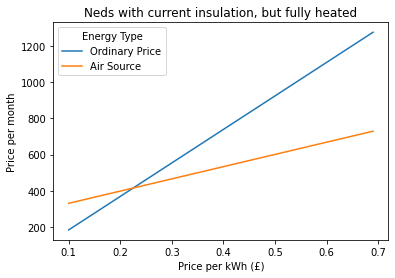

In [3]:
p1= make_scenario_electricity_plot(Neds_current_full_heat)
p1.set_title('Neds with current insulation, but fully heated')
Neds_current_full_heat.electricity_price = basic_electric_price
Neds_current_full_heat.give_summary()
print(f'Air source becomes cheaper at an electricity price of {find_crossing_price(Neds_current_full_heat)*100:.0f} p')

## Future Neds, Fully Heated 

Monthly loan payments would be £263.98 
Monthly heating bill would be £96.68 
Monthly total bill would be 360.66

 Or, with just electric heating:
Monthly heating bill would be £268.62 
Air source becomes cheaper at an electricity price of 31 p


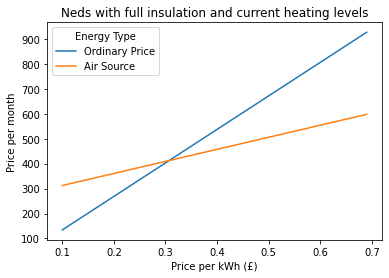

In [4]:
p1= make_scenario_electricity_plot(Neds_future_full_heat)
p1.set_title('Neds with full insulation and current heating levels')
Neds_future_full_heat.electricity_price = basic_electric_price
Neds_future_full_heat.give_summary()
print(f'Air source becomes cheaper at an electricity price of {find_crossing_price(Neds_future_full_heat)*100:.0f} p')